In [1]:
# Project Image Filtering - Tests on my_imfilter function
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
%load_ext autoreload
%autoreload 2
# modified by Soochahn Lee @ Kookmin University
# For Introduction to Computer Vision course, Spring 2020
import os
from skimage.transform import rescale
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt
from helpers import load_image, save_image, add_snp_noise

from student import my_imfilter, my_medfilter

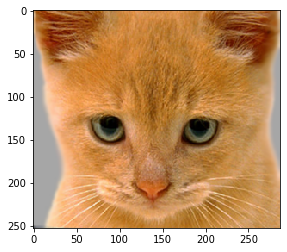

In [3]:
# Load images, make directory to store results, etc.
resultsDir = '..' + os.sep + 'results'
if not os.path.exists(resultsDir):
    os.mkdir(resultsDir)

test_image = load_image('../data/cat.bmp')
test_image = rescale(test_image, 0.7, mode='reflect', multichannel=True)
plt.imshow(test_image)
plt.show()

my_imfilter function in student.py needs to be implemented


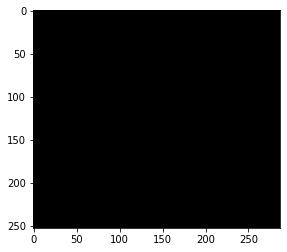

In [4]:
'''
단위필터 (Identity filter)
이 필터는 경계선 처리 방식 옵션과 무관하게 아무 기능도 없어야 함
This filter should do nothing regardless of the padding method you use.
'''
identity_filter = np.asarray(
    [[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
plt.show()
# done = save_image('../results/identity_image.jpg', identity_image)

my_imfilter function in student.py needs to be implemented


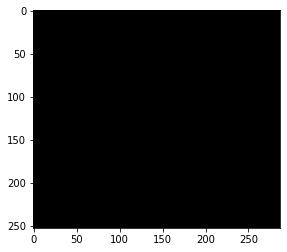

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:19: UserWarning: ..\results\blur_image.jpg is a low contrast image
  return io.imsave(path, img_as_ubyte(im.copy()))


In [5]:
'''
박스 필터를 통해 소량의 블러링 기능 적용
Small blur with a box filter
이 필터는 고주파수 성분을 일부분 제거해야 함
This filter should remove some high frequencies.
'''
blur_filter = np.ones((3, 3), dtype=np.float32)
# making the filter sum to 1
blur_filter /= np.sum(blur_filter, dtype=np.float32)
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
plt.show()
done = save_image(resultsDir + os.sep + 'blur_image.jpg', blur_image)

my_imfilter function in student.py needs to be implemented
my_imfilter function in student.py needs to be implemented


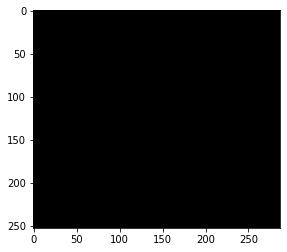

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:19: UserWarning: ..\results\large_blur_image.jpg is a low contrast image
  return io.imsave(path, img_as_ubyte(im.copy()))


In [6]:
'''
대량 블러링
Large blur

This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.
'''
# generate a 1x(2k+1) gaussian kernel with mean=0 and sigma = s, see https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
s, k = 10, 12
large_1d_blur_filter = np.asarray(
    [exp(-z*z/(2*s*s))/sqrt(2*pi*s*s) for z in range(-k, k+1)], dtype=np.float32)
large_1d_blur_filter = large_1d_blur_filter.reshape(5, 5)
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# notice the T operator which transposes the filter
large_blur_image = my_imfilter(large_blur_image, large_1d_blur_filter.T)
plt.imshow(large_blur_image)
plt.show()
done = save_image(resultsDir + os.sep +
                  'large_blur_image.jpg', large_blur_image)

# 대량 블러링의 느린 (무식한) 버전 
# Slow (naive) version of large blur
# (걸리는 시간을 테스트하고 싶으면 아래 코드의 주석처리를 해제하고 수행시켜보세요)
# import time
# large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
# t = time.time()
# large_blur_image = my_imfilter(test_image, large_blur_filter);
# t = time.time() - t
# print('{:f} seconds'.format(t))
##

my_imfilter function in student.py needs to be implemented


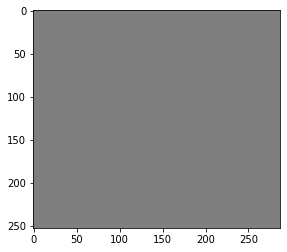

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:19: UserWarning: ..\results\sobel_image.jpg is a low contrast image
  return io.imsave(path, img_as_ubyte(im.copy()))


In [7]:
'''
방향성 필터 (Sobel 연산자)
Oriented filter (Sobel operator)
'''
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
                          dtype=np.float32)  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
plt.show()
done = save_image(resultsDir + os.sep + 'sobel_image.jpg', sobel_image)

my_imfilter function in student.py needs to be implemented


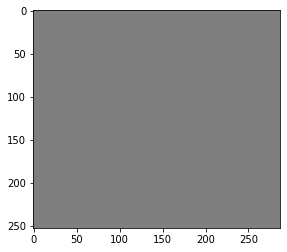

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:19: UserWarning: ..\results\laplacian_image.jpg is a low contrast image
  return io.imsave(path, img_as_ubyte(im.copy()))


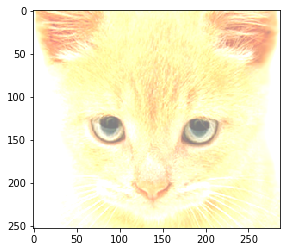

In [8]:
'''
고주파 통과 필터 (이산 라플라시안)
High pass filter (discrete Laplacian)
'''
laplacian_filter = np.asarray(
    [[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure()
plt.imshow(laplacian_image)
plt.show()
done = save_image(resultsDir + os.sep + 'laplacian_image.jpg', laplacian_image)

# 고주파 통과 "필터" 대안
# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure()
plt.imshow(high_pass_image)
plt.show()
done = save_image(resultsDir + os.sep + 'high_pass_image.jpg', high_pass_image)

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


noisy image


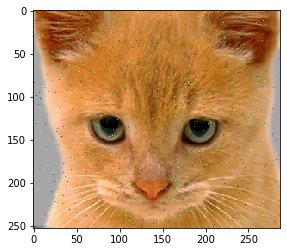

my_imfilter_fft function in student.py is not implemented


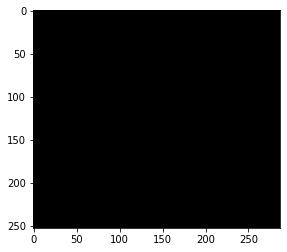

C:\Users\yoonjii\Downloads\hw1\hw1\code\helpers.py:19: UserWarning: ..\results\median_filter_image.jpg is a low contrast image
  return io.imsave(path, img_as_ubyte(im.copy()))


In [9]:
'''
중간값 필터
Median filter
'''
test_noisy_image = add_snp_noise(test_image)
print("noisy image")
plt.imshow(test_noisy_image)
plt.show()

size = 5
med_filter_image = my_medfilter(test_noisy_image, size)
plt.imshow(blur_image)
plt.show()
done = save_image(resultsDir + os.sep + 'median_filter_image.jpg', blur_image)